# Factorisation LU

Mettez ci-dessous les imports classiques de librairie Python

In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

Le but de ce TP est d'implémenter la factorisation LU, avec et sans permutations, et de tester ces méthodes pour résoudre un système linéaire. Dans cette dernière partie, on implémentera un algorithme de résolution de systèmes triangulaires.

## 1) Algorithme de factorisation LU standard

On se propose tout d'abord d'implémenter un code de factorisation LU qui prendra en entrée une matrice $A$ carré de taille quelconque et qui donnera en sortie le couple de matrice L et U correspondant à la factorisation LU de la matrice A. On rappelle que la factorisation LU s'obtient à partir de la méthode de pivot de Gauss. Plus précisément, la factorisation LU peut se résumer à l'algorithme suivant



$$
\begin{array}{l}
U=copy(A) \\
L=0 \\
\textrm{Pour } j = 1,\cdots,n-1: \\
\ \left| 
\begin{array}{l}
\textrm{Pour } i = j+1,\cdots,n: \\
\ \left| 
\begin{array}{ll}
\displaystyle L[i,j]&=&\displaystyle \frac{U[i,j]}{U[j,j]} \\
\displaystyle U[i,:]&=&\displaystyle U[i,:]-L[i,j]U[j,:]
\end{array}
\right.
\end{array}
\right. \\
L=L+Id
\end{array}
$$


> **A faire :** Implémenter la fonction `LU` qui permet de calculer la factorisation LU d'une matrice $A$ carré de dimension quelconque à partir de l'algorithme précédent. On prendra soin de vérifier si le pivot est non-nul et, dans le cas contraire, on renverra une erreur à l'utilisateur. On pourra tester la fonction sur la matrice
$$
A = \left(\begin{array}{ccc}
2 & 1 & 1 \\
6 & 2 & 1 \\
-2 & 2 & 1
\end{array}\right),
$$
dont la décomposition LU est donnée par
$$
L = \left(\begin{array}{ccc}
1 & 0 & 0 \\
3 & 1 & 0 \\
-1 & -3 & 1
\end{array}\right)\quad\textrm{et}\quad U = \left(\begin{array}{ccc}
2 & 1 & 1 \\
0 & -1 & -2 \\
0 & 0 & -4
\end{array}\right).
$$

In [2]:
def LU(A):
    n = len(A)
    L = np.eye(n)
    U = np.zeros((n,n))
    for k in range(n):
        U[k,k] = A[k,k] - np.dot(L[k,:],U[:,k])
        for i in range(k+1,n):
            L[i,k] = (A[i,k] - np.dot(L[i,:],U[:,k]))/U[k,k]
        for j in range(k+1,n):
            U[k,j] = A[k,j] - np.dot(L[k,:],U[:,j])
    return L,U

In [3]:
A = np.array([[2.,1,1],[6,2,1],[-2,2,1]])
L,U = LU(A)
print("L=",L)
print("U=",U)
print("LU=",L.dot(U))

L= [[ 1.  0.  0.]
 [ 3.  1.  0.]
 [-1. -3.  1.]]
U= [[ 2.  1.  1.]
 [ 0. -1. -2.]
 [ 0.  0. -4.]]
LU= [[ 2.  1.  1.]
 [ 6.  2.  1.]
 [-2.  2.  1.]]


## 2) Algorithme de factorisation LU avec stratégie de pivot partiel


On passe maintenant à la factorisation LU avec la stratégie de pivot partiel. Cette méthode met en place, durant le pivot de Gauss, des permutations sur les lignes qui permettent de diminuer les erreurs numériques et de parer au problème d'un pivot nul. Ces permutations sur les lignes vont faire en sorte que le pivot dans la méthode de Gauss est toujours le plus grand possible. En pratique, à chaque étape $k$, lors du choix du pivot, on va chercher dans la colonne $k$ le plus grand pivot (en valeur absolue) puis on va procèder à une permutation entre la ligne de ce pivot et la ligne $k$. Plus précisément, la factorisation LU avec permutations peut se résumer à l'algorithme suivant

$$
\begin{array}{l}
U=copy(A) \\
L=0 \\
P=Id \\
\textrm{Pour } j = 1,\cdots,n-1: \\
\ \left| 
\begin{array}{l}
k = \textrm{argmax}_{j\leq m \leq n} |U[m,j]|\\
P=Permut(P,j,k) \\
U=Permut(U,j,k) \\
L=Permut(L,j,k) \\
\textrm{Pour } i = j+1,\cdots,n: \\
\ \left| 
\begin{array}{ll}
\displaystyle L[i,j]&=&\displaystyle \frac{U[i,j]}{U[j,j]} \\
\displaystyle U[i,:]&=&\displaystyle U[i,:]-L[i,j]U[j,:]
\end{array}
\right.
\end{array}
\right. \\
L=L+Id
\end{array}
$$

On écrit une fonction `Permut` qui prendra en argument une matrice et le couple d'indice et donnera en sortie la matrice avec ses lignes permutées. Afin d'identifier l'indice du plus grand pivot, on pourra s'aider de la fonction `argmax`. On rappelle de plus que, pour une matrice de permutation $P$, on a

$$
P^{-1} = P^T.
$$

> **A faire :** Implémenter la fonction `PLU` qui permet de calculer la factorisation LU d'une matrice $A$ carré de dimension quelconque à partir de l'algorithme précédent. On prendra soin de vérifier si le pivot est non-nul et, dans le cas contraire, on renverra une erreur à l'utilisateur. On pourra tester la fonction sur la matrice
$$
A = \left(\begin{array}{ccc}
1 & 1 & 1 & 1 \\
1 & 1 & 3 & 3 \\
1 & 1 & 2 & 3\\
1 & 3 & 3 & 3
\end{array}\right),
$$
dont la décomposition PLU est donnée par
$$
P = \left(\begin{array}{ccc}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0
\end{array}\right),\quad L = \left(\begin{array}{ccc}
1 & 0 & 0 & 0\\
1 & 1 & 0 & 0\\
1 & 0 & 1 & 0\\
1 & 0 & 1/2 & 1
\end{array}\right)\quad\textrm{et}\quad U = \left(\begin{array}{ccc}
1 & 1 & 1 & 1\\
0 & 2 & 2 & 2\\
0 & 0 & 2 & 2\\
0 & 0 & 0 & 1
\end{array}\right).
$$

In [5]:
def Permut(A,i,j):
    A[[i,j],:] = A[[j,i],:]
    return A

def PLU(A):
    n = len(A)
    P = np.eye(n)
    L = np.eye(n)
    U = np.zeros((n,n))
    for k in range(n):
        i = np.argmax(np.abs(A[k:,k]))+k
        if i != k:
            A = Permut(A,i,k)
            P = Permut(P,i,k)
        U[k,k] = A[k,k] - np.dot(L[k,:],U[:,k])
        for i in range(k+1,n):
            L[i,k] = (A[i,k] - np.dot(L[i,:],U[:,k]))/U[k,k]
        for j in range(k+1,n):
            U[k,j] = A[k,j] - np.dot(L[k,:],U[:,j])
    return P,L,U

In [6]:
A = np.array([[1.,1,1,1],[1,1,3,3],[1,1,2,3],[1,3,3,3]])
P,L,U = PLU(A)
print("P=",P)
print("L=",L)
print("U=",U)
print('0 ??',P@A-L@U)

P= [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
L= [[1.  0.  0.  0. ]
 [1.  1.  0.  0. ]
 [1.  0.  1.  0. ]
 [1.  0.  0.5 1. ]]
U= [[1. 1. 1. 1.]
 [0. 2. 2. 2.]
 [0. 0. 2. 2.]
 [0. 0. 0. 1.]]
0 ?? [[ 0.  0.  0.  0.]
 [ 0. -2. -1.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  1.  0.]]


## 3) Résolution de systèmes triangulaires et comparaison des méthodes

Nous allons à présent comparer les 2 méthodes que nous venons d'implémenter. Le but est de tester ces méthodes sur un système linéaire. Or, on sait que pour résoudre un tel système il faut passer par la résolution de systèmes triangulaires (supérieurs et inférieurs). Ainsi, avant de passer à la suite, on se propose d'implémenter une méthode permettant de résoudre un système triangulaire, qu'il soit inférieur ou supérieur.

On rappelle que l'algorithme de résolution pour un système triangulaire de la forme

$$
Tx = b,
$$

s'écrit, si $T$ est triangulaire inférieure,

$$
x_1 = b_1/T_{1,1}\\
\textrm{Pour}\; k = 2,3,\cdots, n\; :
x _k = \left(b_k - \sum_{j = 1}^{k-1} T_{k,j} x_j\right)/T_{k,k},
$$

et, si $T$ est triangulaire supérieure,

$$
x_n = b_n/T_{n,n}\\
\textrm{Pour}\; k = n-1,n-2,\cdots, 1\; :
x _k = \left(b_k - \sum_{j = k+1}^{n} T_{k,j} x_j\right)/T_{k,k}.
$$

> **A faire :** Implémenter la fonction `Solve_Triang` qui permet de résoudre un système linéaire triangulaire (inférieur ou supérieur). Cette fonction prendra en entrée une matrice et un vecteur (correspondant aux données du système linéaire) ainsi qu'une variable précisant si le système est triangulaire supérieur ou inférieur et donnera en sortie un vecteur qui est la solution que l'on cherche.

In [7]:
def Solve_Triang(A,b,isUpper):
    n = len(A)
    x = np.zeros(n)
    if isUpper:
        for i in range(n-1,-1,-1):
            x[i] = (b[i] - np.dot(A[i,i+1:],x[i+1:]))/A[i,i]
    else:
        for i in range(n):
            x[i] = (b[i] - np.dot(A[i,:i],x[:i]))/A[i,i]
    return x

On a charger, en début de ce notebook, la matrice $M$ de taille 100. A l'aide des deux méthodes de factorisation et de la méthode de résolution d'un système triangulaire, vous allez résoudre le système linéaire

$$
Mx = b,
$$

où $b\in\mathbb{R}^{100}$ est tel que $b_i = 1$, pour tout $1\leq i\leq n$.

> **A faire :** Résoudre le système précédent à l'aide de la factorisation LU standard et celle avec permutations. Comparer les résultats obtenus avec la solution obtenue avec `npl.solve(M,b)`. Quelle méthode donne le meilleur résultat?

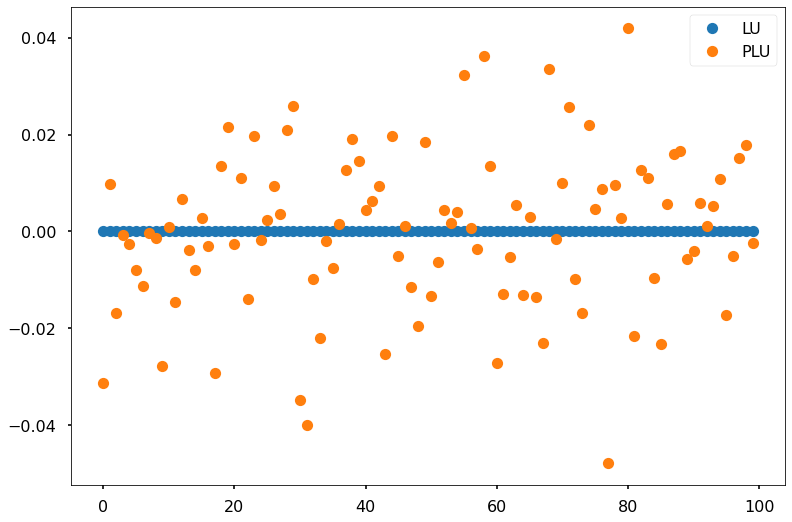

In [11]:
M = np.load('TP6_Matrice.npy').astype(float)
n=M.shape[0]
b=np.ones(n)

def Solve_LU(A,b):
    L,U = LU(A)
    y = Solve_Triang(L,b,False)
    x = Solve_Triang(U,y,True)
    return x

def Solve_PLU(A,b):
    P,L,U = PLU(A)
    y = Solve_Triang(L,P@b,False)
    x = Solve_Triang(U,y,True)
    return x

x_lu = Solve_LU(M,b)
x_plu = Solve_PLU(M,b)
x_npl = npl.solve(M,b)

plt.style.use('seaborn-poster')

# plot diff with npl for both methods
plt.plot(x_lu-x_npl,'o',label='LU')
plt.plot(x_plu-x_npl,'o',label='PLU')
plt.legend()
plt.show()